#                                                Census Income


Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

The prediction task is to determine whether a person makes over $50K a year.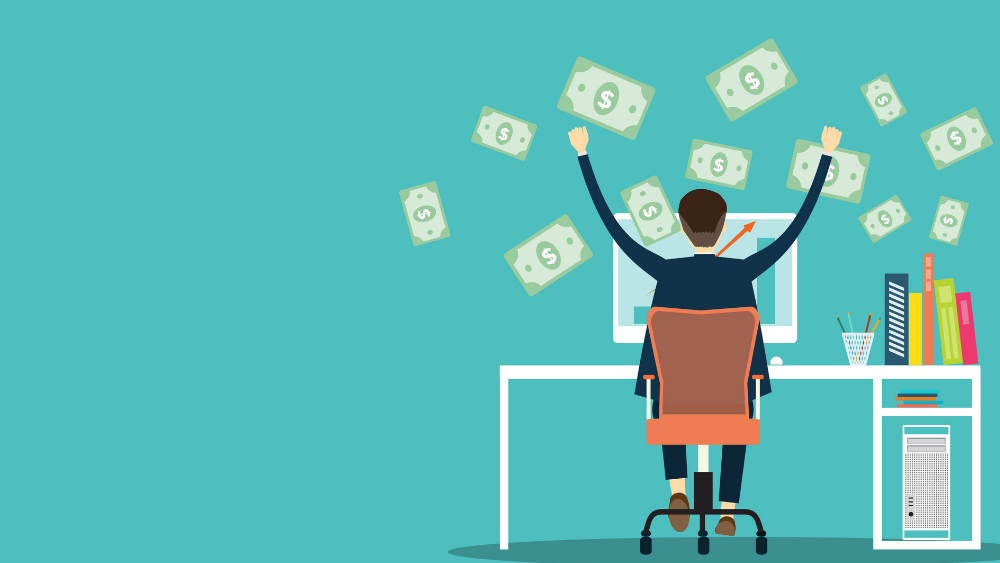


# Data Description 


fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. 
We use 3 sets of controls. 
These are:
    A single cell estimate of the population 16+ for each state.
    Controls for Hispanic Origin by age and sex.
    Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Step 1: Importing Libraries
    
    

In [239]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [240]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

from subprocess import check_output


#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')


# Step 2: Loading the Dataset

In [241]:
df = pd.read_csv('Cencus.txt')
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Observations : There are 5 rows are analysed using head() method. the dataframe contains categorical data which we need to convert into numeric in order to feed our data to machine learning model. As pet our problem statemnet i have to predict the income is below 50K or beyond for that we build classification model for converted binary data
    

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation: The data-set contains 32560 entries i.e. rows and 15 columns outof that 14 are feature variable and 1 target variable. 6 are integers and 9 are objects.

# Attritutes Information:

0   Age             : this column shows the age of person.

1   Workclass       : this column shows Job Type.

2   Fnlwgt          : this column shows Final weight. 

3   Education       : this refers to Education person qualified.

4   Education_num   : this refers to education in numbers form. 

5   Marital_status  : this shows marital status of person.

6   Occupation      : this shows current occupation.

7   Relationship    : this column shows relationship of person.

8   Race            : this refers to residential segregation.

9   Sex             : this shows gender.

10  Capital_gain    : capital gain is profit one earn.

11  Capital_loss    : capital loss is profit one loss.

12  Hours_per_week  : Earning rate as per hrs

13  Native_country  : Country

14  Income          : Income(Target)


In [243]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [244]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [245]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [246]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [247]:
df['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [248]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [249]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [250]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [251]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [252]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [253]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [254]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [255]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [256]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [257]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [258]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [259]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

Observation:
    From above i come to know that there is no null values present in dataset. In column named 'Native_country','Occupation','Workclass' contains "?" which can be treated as balnk entry i.e null value which i replace with authentic value.

In [260]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Observation: Here there are 1843 rows that contains '?' in 'Occupation' column.

In [261]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


Observation : In above dataframe there are 583 rows having '?' in 'Native_country' column.

In [262]:
df.loc[df.Workclass==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Obervations: 1836 rows contains '?' for 'Workclass' column in the dataset which is big in number.

We Drop all this ' ?' present in 'Native_country', 'Occupation', 'Workclass' columns using drop method.

In [263]:
df.drop(df[df['Occupation']==' ?'].index, inplace=True)
df.drop(df[df['Native_country']==' ?'].index, inplace=True)
df.drop(df[df['Workclass']==' ?'].index, inplace=True)


In [264]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [265]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [266]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

Observation: Here all the ' ?' entries values are removed from the dataset.

In [267]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Step 3: Data Visualization

EDA: Grapical relationship and distribution of feature variables preset in the data frame.

<AxesSubplot:>

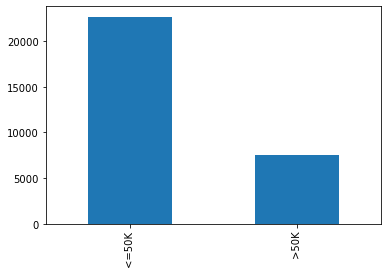

In [268]:
df['Income'].value_counts().plot(kind='bar')

Observation: From above graph the people with income<=50K is high in count than people with income>50K.

# Distribution of 'Capital_gain' and 'Occupation' as per gender

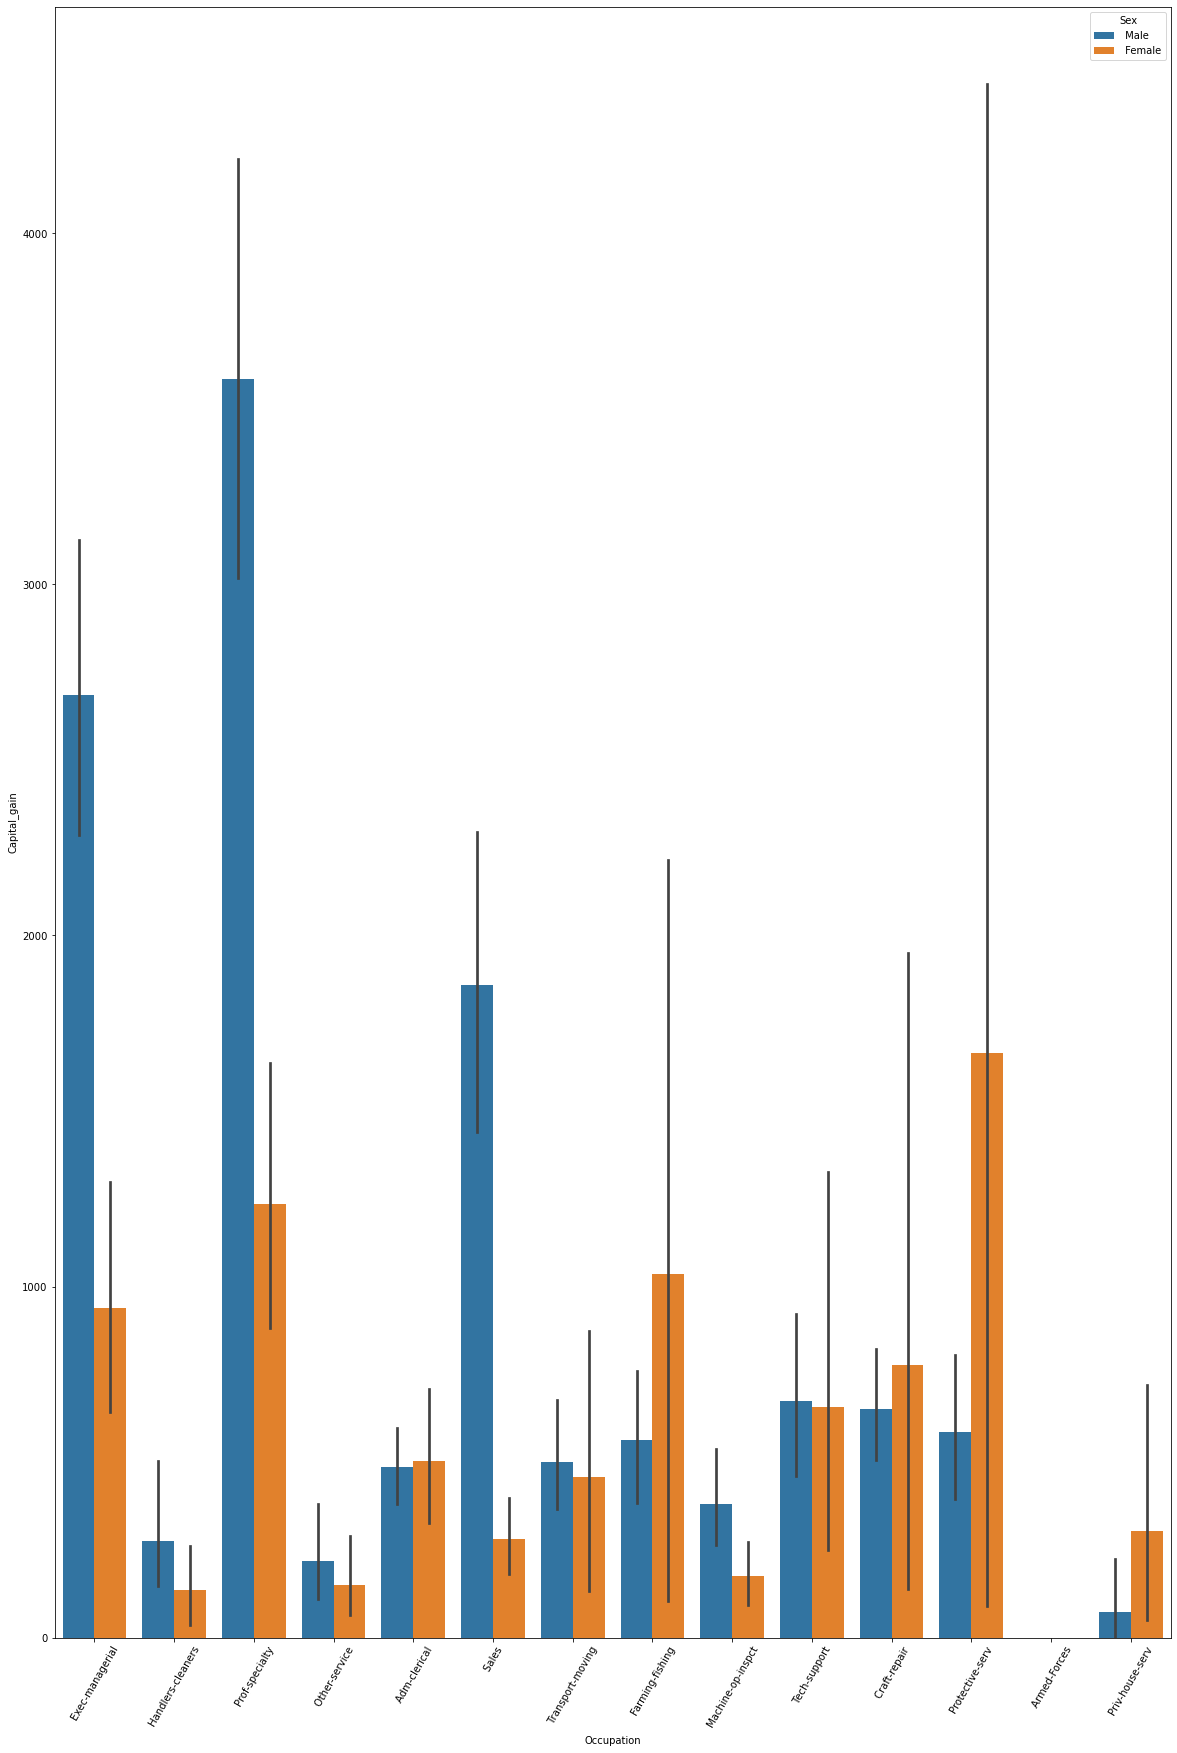

In [269]:
plt.figure( figsize = (20,30) )
sns.barplot( x='Occupation', y='Capital_gain', data = df, hue = 'Sex')
plt.xticks(rotation = 60)
plt.show()

# Distribution between 'Education' and 'Hours_per_week' with reference to 'Income'

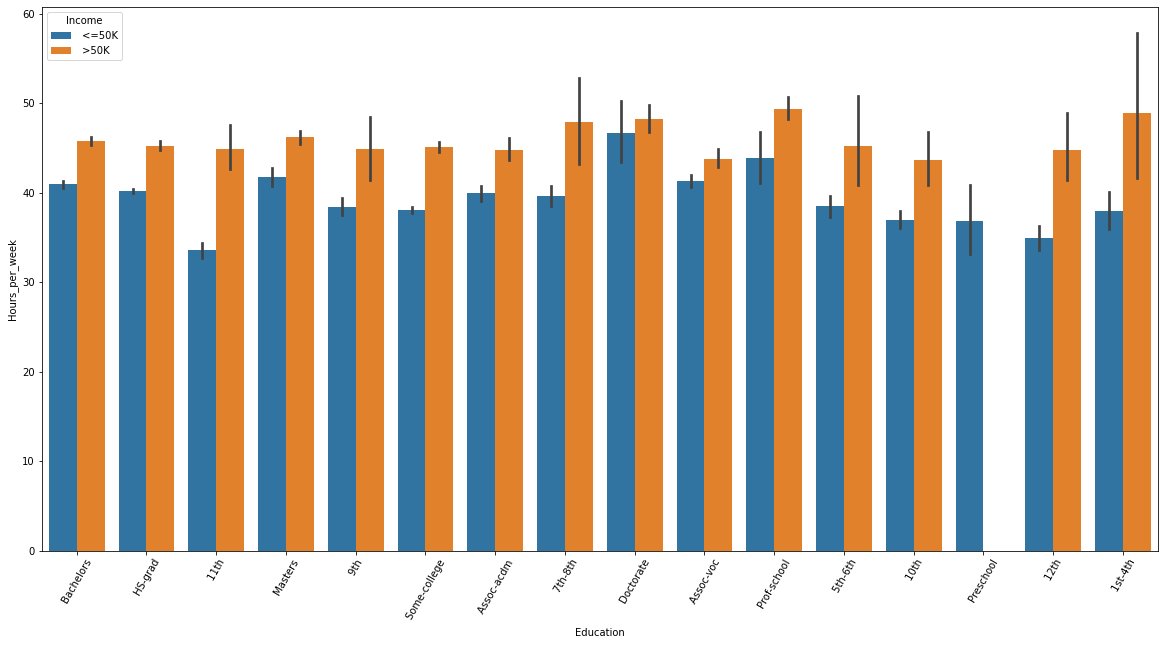

In [270]:
plt.figure( figsize = (20,10) )
sns.barplot( x='Education', y='Hours_per_week', data = df, hue = 'Income' )
plt.xticks(rotation = 60)
plt.show()

# Step 4: Data Preprocessing & Feature Engineering :

Encoding Categorical Variables : Here two columns 'Income' and 'Sex' having categorical values using pandas get_dummies function to convert into numeric and 2 variables “Income” and “Sex” columns converting into binary using label encoder.

In [271]:
le = LabelEncoder() # label encoder
df['Income'] = le.fit_transform(df['Income'])
df['Sex'] = le.fit_transform(df['Sex'])

#Converting two columns into binary
df = pd.get_dummies( df,drop_first = True )
pd.set_option('display.max_columns',100)  #To display all columns

In [272]:
df.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Observation: Now data transform into numeric.

# Step 4: Model building

In [273]:
#Now divide into dependent and independent variables.
X = df.drop(['Income'],axis=1)
y = df['Income']

In [274]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [275]:
lr = LogisticRegression() #Logistic regression
dt = DecisionTreeClassifier() #Decision tree classifier
knn = KNeighborsClassifier() #K neighbhours classifier
svc = SVC()  #Support Vector Classifier
ada = AdaBoostClassifier()  #Ada boost classifier
gdboost = GradientBoostingClassifier()   #Gradient Boost Classifier
xgboost = XGBClassifier()     #Xtrim Gradient Boosting Classifier
print("Model is created.......")

Model is created.......


In [276]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)
svc.fit(X_train,y_train)
ada.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained........")

Model is trained........


Model has been trained now checking for the accuracy:

In [279]:
print("Lr classification score",lr.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("SVC classification score",svc.score(X_train,y_train))
print("ada boost classification score",ada.score(X_train,y_train))
print("Gradient boost classification score",gdboost.score(X_train,y_train))
print("Xtrim Gradient Boost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.7901667298219023
dt classification score 1.0
knn classification score 0.8299545282303903
SVC classification score 0.7857616521409625
ada boost classification score 0.8606479727169383
Gradient boost classification score 0.8692212959454338
Xtrim Gradient Boost classification score 0.9067355058734369


# Step 5: Model Evaluation

Using confusion matrix in order to evaluate the models accuracy.

In [280]:
lr_ypred = lr.predict(X_test)
dt_ypred = dt.predict(X_test)
knn_ypred = knn.predict(X_test)
svc_ypred = svc.predict(X_test)
adb_ypred = ada.predict(X_test)
Grbst_ypred = gdboost.predict(X_test)
XtGradnt_ypred = xgboost.predict(X_test)

Using Confusion Matrix in order to evaluate the models accuracy

In [281]:
lr_conf_matrix = confusion_matrix(y_test,lr_ypred)
print("Confusion matrix for lr_model",'\n',lr_conf_matrix)

Confusion matrix for lr_model 
 [[6587  233]
 [1639  590]]


In [282]:
dt_conf_matrix = confusion_matrix(y_test,dt_ypred)
print("Confusion matrix for dt_model",'\n',dt_conf_matrix)

Confusion matrix for dt_model 
 [[5895  925]
 [ 849 1380]]


In [283]:
knn_conf_matrix = confusion_matrix(y_test,knn_ypred)
print("Confusion matrix for KNN_model",'\n',knn_conf_matrix)

Confusion matrix for KNN_model 
 [[6233  587]
 [1545  684]]


In [284]:
svc_conf_matrix = confusion_matrix(y_test,svc_ypred)
print("Confusion matrix for svc_model",'\n',svc_conf_matrix)

Confusion matrix for svc_model 
 [[6818    2]
 [1914  315]]


In [285]:
ada_conf_matrix = confusion_matrix(y_test,adb_ypred)
print("Confusion matrix for ada boost_model",'\n',ada_conf_matrix)

Confusion matrix for ada boost_model 
 [[6377  443]
 [ 888 1341]]


In [286]:
gdboost_conf_matrix = confusion_matrix(y_test,Grbst_ypred)
print("Confusion matrix for gdboost_model",'\n',gdboost_conf_matrix)

Confusion matrix for gdboost_model 
 [[6413  407]
 [ 872 1357]]


In [287]:
xgboost_conf_matrix = confusion_matrix(y_test,XtGradnt_ypred)
print("Confusion matrix for XtGradnt_ypred_model",'\n',xgboost_conf_matrix)

Confusion matrix for xgboost_model 
 [[6322  498]
 [ 745 1484]]


Checking Classification Report for each Model:

In [291]:
lr_report = classification_report(y_test,lr_ypred)
print("lr classification_report",'\n',lr_report)

dt_report = classification_report(y_test,dt_ypred)
print("dt classification_report",'\n',dt_report)

knn_report = classification_report(y_test,knn_ypred)
print("knn classification_report",'\n',knn_report)

scv_report = classification_report(y_test,svc_ypred)
print("scv classification_report",'\n',scv_report)

adb_report = classification_report(y_test,adb_ypred)
print("adb classification_report",'\n',adb_report)

Grbst_report = classification_report(y_test,Grbst_ypred)
print("Grbst classification_report",'\n',Grbst_report)

XtGradnt_report = classification_report(y_test,XtGradnt_ypred)
print("XtGradnt classification_report",'\n',XtGradnt_report)

lr classification_report 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6820
           1       0.72      0.26      0.39      2229

    accuracy                           0.79      9049
   macro avg       0.76      0.62      0.63      9049
weighted avg       0.78      0.79      0.76      9049

dt classification_report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6820
           1       0.60      0.62      0.61      2229

    accuracy                           0.80      9049
   macro avg       0.74      0.74      0.74      9049
weighted avg       0.81      0.80      0.81      9049

knn classification_report 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      6820
           1       0.54      0.31      0.39      2229

    accuracy                           0.76      9049
   macro avg       0.67      0.61      0.62   

consider F1-score since our data is imbalanced and there are two models "grbst","XtGradnt" giving more than 90% scores.all rest model giving below 90%. In order to check our model is overfitted or not we are checking cross validiation for for tow models

# ROC AUC Curve:

To evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [296]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,ada.predict(X_test)))
print(roc_auc_score(y_test,svc.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.6152642322149117
0.7417406053764758
0.6103968416856447
0.7683295311470104
0.57051286099391
0.7745578807218628
0.7963744377303185


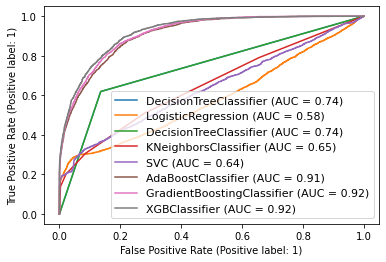

In [297]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')


# Step 6: K-Fold Cross Validation

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 3 folds (K = 3). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation every time.

In [298]:
#Importing cross validation from sklearn.
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [300]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())


Mean of Cross validation score for gdboost  model => 0.8617420939914467
Cross validation score for xgboost model => 0.8670137849256147


As per above we can see our ‘xgboost’ model giving the less cross validation score. so we will consider this model is best for our prediction.Now hyperparameter tuning to check chances of accuracy increase.

In [303]:
from sklearn.model_selection import GridSearchCV
xgboost.get_params().keys()  # to check the parameters
parm_grid  = {'max_depth' : [3,4],
              'subsample' : [0.5,0.8],
              'learning_rate': [0.1],
              'min_child_weight' : [1,2],
              'random_state' : [4,5]}

#giving above parameters to our model and behalf of this will train it again.
gridsearch = GridSearchCV(xgboost, param_grid = parm_grid , cv=5)
#fit the model using given paramters
gridsearch.fit(X_train,y_train)
#traning the model now

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [304]:
gridsearch.best_params_
#printing the best parameters 

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'random_state': 4,
 'subsample': 0.8}

In [307]:
xgboost_tuning=XGBClassifier(learning_rate=0.1,max_depth=4,min_child_weight=2,random_state=4,subsample=0.8)
#supplying best parameters to our model
xgboost_tuning.fit(X_train,y_train)
#train the model
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1)
#predicting the values using test data
xgboost_tuning_yprad = xgboost_tuning.predict(X_test)

#printing the classification report
xgboost_report = classification_report(y_test,xgboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6820
           1       0.77      0.62      0.69      2229

    accuracy                           0.86      9049
   macro avg       0.82      0.78      0.80      9049
weighted avg       0.85      0.86      0.86      9049



The hyper parameter tuning also we are getting almost same scores.

# Step 7: Pickleing model

In [309]:
#Saving Model
import pickle
Census_model = 'Census_model.pickle'
pickle.dump(xgboost_tuning,open(Census_model,'wb'))

In [ ]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(Census_model, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)